## Descriptive Data Analysis

#### Importing 

In [1]:
import sys
sys.path.append('../')
import pandas as pd
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
from src.data_quality_checks import get_total_missing_percentage, check_missing_data
from src.descriptive_statistics import describe_numerical, summarize_categorical
from src.plots import plot_histograms, plot_bar_charts, display_summary_table, scatter_plot_advanced, scatter_plot, box_plots

#### Data Understanding

In [2]:
# Loading historical data
file_path = "../data/MachineLearningRating_v3.txt"

df = pd.read_csv(file_path, sep='|', low_memory=False)

In [3]:
# Total number rows in the dataset
len(df)

1000098

In [4]:
# compute date range in the dataset
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])

min_date = df['TransactionMonth'].min()
max_date = df['TransactionMonth'].max()

df['TransactionMonth'].sort_values()

print('Min Date:', min_date)
print('Max Date:', max_date)

Min Date: 2013-10-01 00:00:00
Max Date: 2015-08-01 00:00:00


In [5]:
# checking data types
df.dtypes

UnderwrittenCoverID                  int64
PolicyID                             int64
TransactionMonth            datetime64[ns]
IsVATRegistered                       bool
Citizenship                         object
LegalType                           object
Title                               object
Language                            object
Bank                                object
AccountType                         object
MaritalStatus                       object
Gender                              object
Country                             object
Province                            object
PostalCode                           int64
MainCrestaZone                      object
SubCrestaZone                       object
ItemType                            object
mmcode                             float64
VehicleType                         object
RegistrationYear                     int64
make                                object
Model                               object
Cylinders  

Selected relevant columns from the dataset

In [6]:
relevant_cols = ['TransactionMonth','TotalPremium', 'TotalClaims', 'PostalCode', 'Citizenship', 'Province', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'NewVehicle', 'CoverCategory', 'CoverType']

In [7]:
df_relevant_cols = df[relevant_cols]

In [8]:
numerical_cols = [ 'TotalPremium', 'TotalClaims']

categorical_cols = ['PostalCode','Citizenship', 'Province', 'VehicleType', 'RegistrationYear', 'make', 'Model', 'NewVehicle', 'CoverCategory', 'CoverType']

df_numerical_cols = df[numerical_cols]
print(len(df_numerical_cols.columns))
df_categorical_cols = df[categorical_cols]
print(len(df_categorical_cols.columns))

2
10


#### Data Summarization

In [9]:
# descriptive analysis for numerical datasets
numerical_desc_analysis = describe_numerical(df_numerical_cols)
display_summary_table(numerical_desc_analysis)


TotalPremium:
+----+---------+----------------+
|    | index   |   TotalPremium |
|----+---------+----------------|
|  0 | count   |     1.0001e+06 |
|  1 | mean    |    61.9055     |
|  2 | std     |   230.285      |
|  3 | min     |  -782.577      |
|  4 | 25%     |     0          |
|  5 | 50%     |     2.17833    |
|  6 | 75%     |    21.9298     |
|  7 | max     | 65282.6        |
+----+---------+----------------+

TotalClaims:
+----+---------+-----------------+
|    | index   |     TotalClaims |
|----+---------+-----------------|
|  0 | count   |      1.0001e+06 |
|  1 | mean    |     64.8612     |
|  2 | std     |   2384.07       |
|  3 | min     | -12002.4        |
|  4 | 25%     |      0          |
|  5 | 50%     |      0          |
|  6 | 75%     |      0          |
|  7 | max     | 393092          |
+----+---------+-----------------+


In [10]:
# summerization for categorical datasets
categorical_summary = summarize_categorical(df_categorical_cols)
display_summary_table(categorical_summary)


Citizenship:
+----+---------------+---------+
|    | Citizenship   |   count |
|----+---------------+---------|
|  0 |               |  895210 |
|  1 | ZA            |  103721 |
|  2 | ZW            |     936 |
|  3 | AF            |     231 |
+----+---------------+---------+

Province:
+----+---------------+---------+
|    | Province      |   count |
|----+---------------+---------|
|  0 | Gauteng       |  393865 |
|  1 | Western Cape  |  170796 |
|  2 | KwaZulu-Natal |  169781 |
|  3 | North West    |  143287 |
|  4 | Mpumalanga    |   52718 |
|  5 | Eastern Cape  |   30336 |
|  6 | Limpopo       |   24836 |
|  7 | Free State    |    8099 |
|  8 | Northern Cape |    6380 |
+----+---------------+---------+

VehicleType:
+----+-------------------+---------+
|    | VehicleType       |   count |
|----+-------------------+---------|
|  0 | Passenger Vehicle |  933598 |
|  1 | Medium Commercial |   53985 |
|  2 | Heavy Commercial  |    7401 |
|  3 | Light Commercial  |    3897 |
|  4 | Bu

In [11]:
print(df_numerical_cols['TotalPremium'].nunique())

38959


In [12]:
print(df_numerical_cols['TotalClaims'].nunique())

1615


#### Data Quality Assessment

In [13]:
# checking for columns with missing values
missing_data = check_missing_data(df_relevant_cols)
print(missing_data)

    Column Name  Missing Values  Percentage Missing
6   VehicleType             552            0.055195
8          make             552            0.055195
9         Model             552            0.055195
10   NewVehicle          153295           15.327998


In [14]:
# check total missing values percentage in the dataset
missing_values = get_total_missing_percentage(df_relevant_cols)
print(missing_values)

1.1918139714615659


#### Data Cleaning

In [16]:
df_relevant_cols.loc[:, 'VehicleType'] = df_relevant_cols['VehicleType'].fillna(df_relevant_cols['VehicleType'].mode()[0])
df_relevant_cols.loc[:, 'make'] = df_relevant_cols['make'].fillna(df_relevant_cols['make'].mode()[0])
df_relevant_cols.loc[:, 'Model'] = df_relevant_cols['Model'].fillna(df_relevant_cols['Model'].mode()[0])
df_relevant_cols.loc[:, 'NewVehicle'] = df_relevant_cols['NewVehicle'].fillna(df_relevant_cols['NewVehicle'].mode()[0])


In [17]:
# checking for columns with missing values
missing_data = check_missing_data(df_relevant_cols)
print(missing_data)

Success: No missing values.


In [18]:
# check total missing values percentage in the dataset
missing_values = get_total_missing_percentage(df_relevant_cols)
print(missing_values)

0.0


#### Univariate analysis

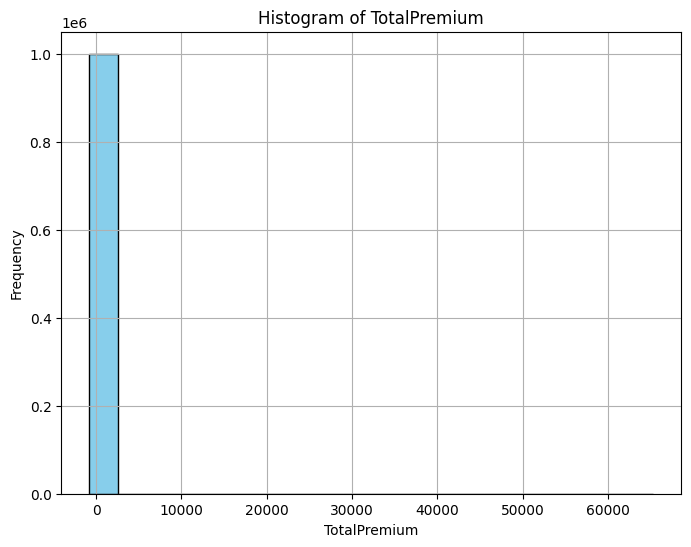

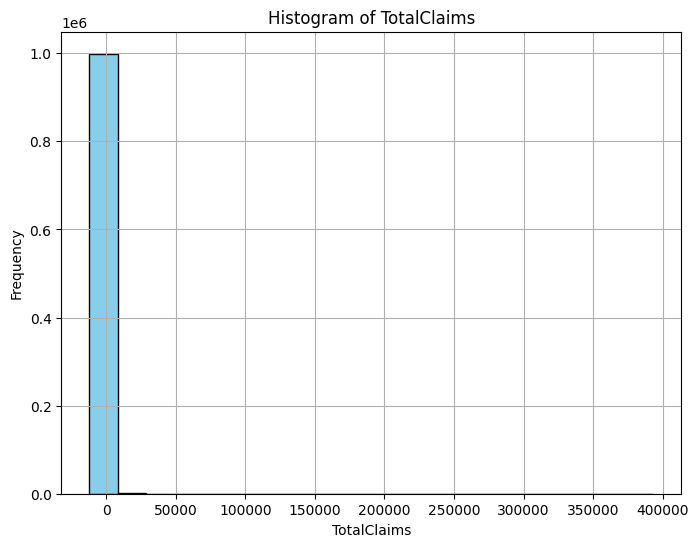

In [19]:
# plot histograms for numerical columns 
plot_histograms(df_numerical_cols)

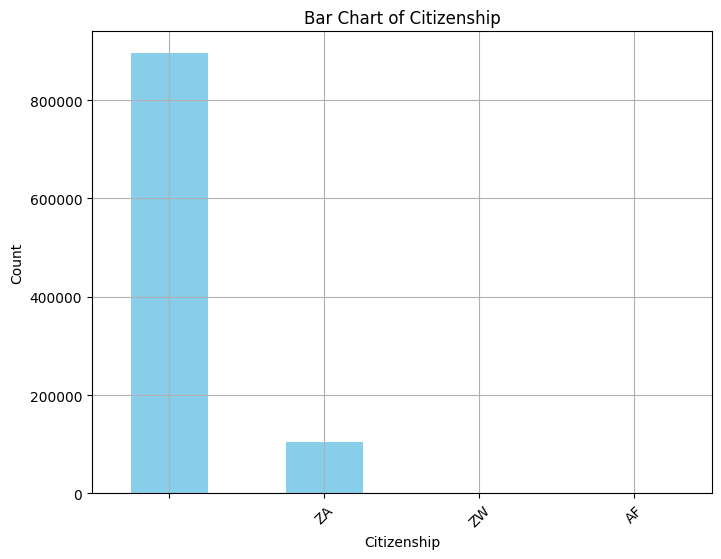

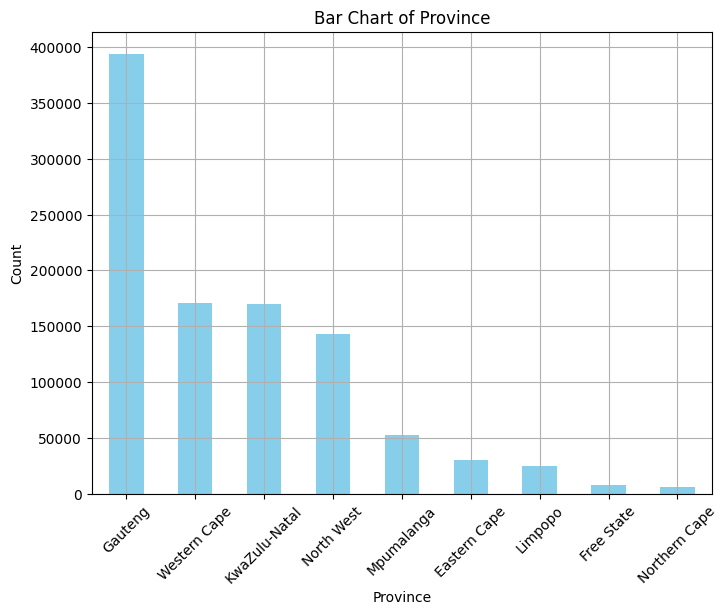

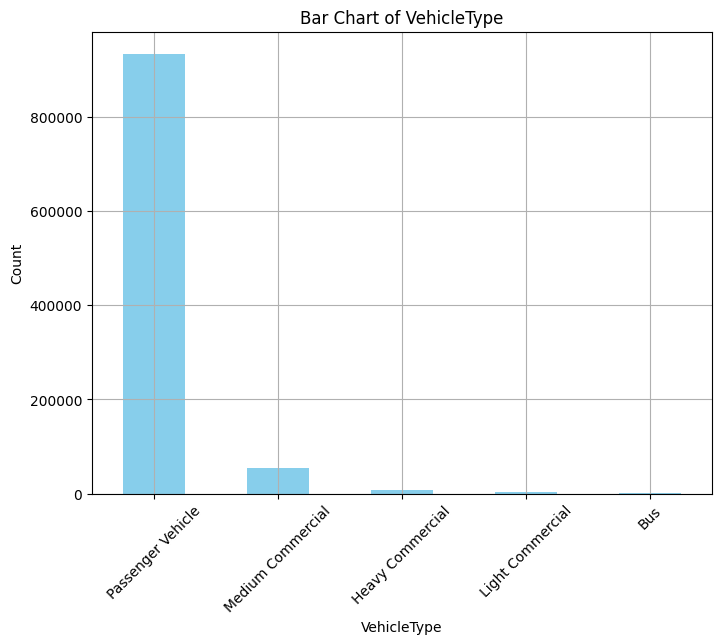

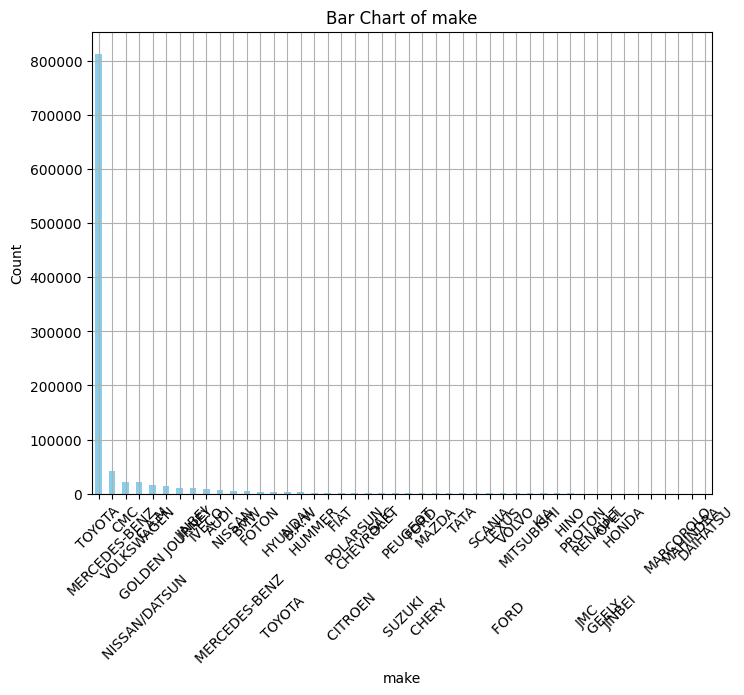

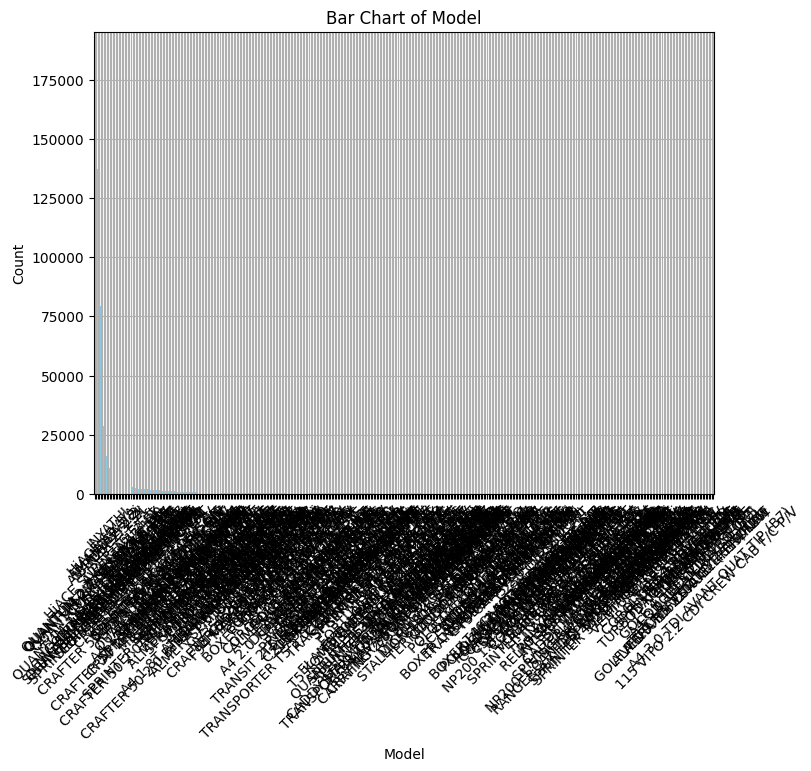

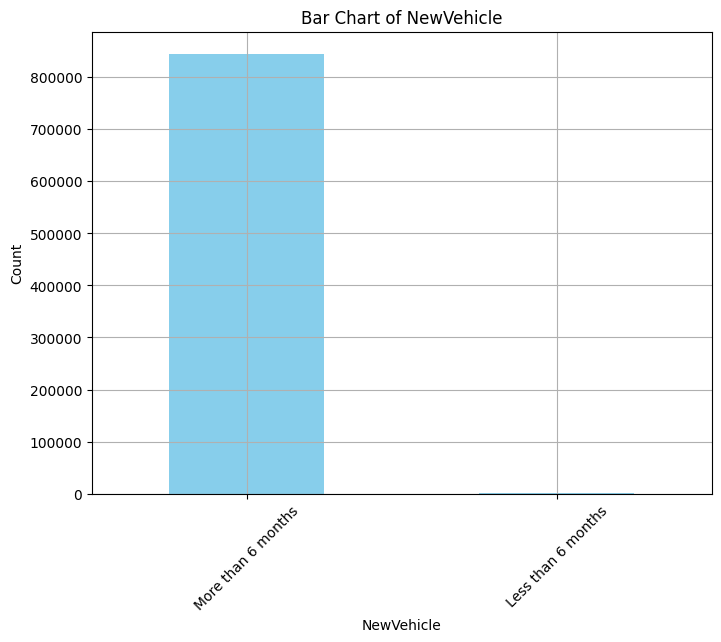

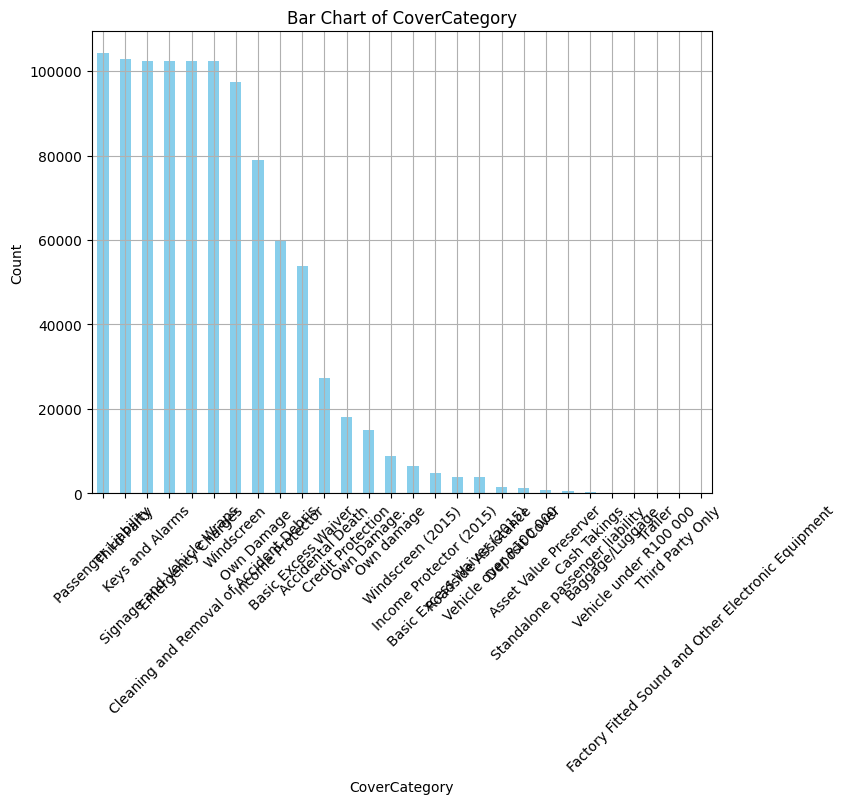

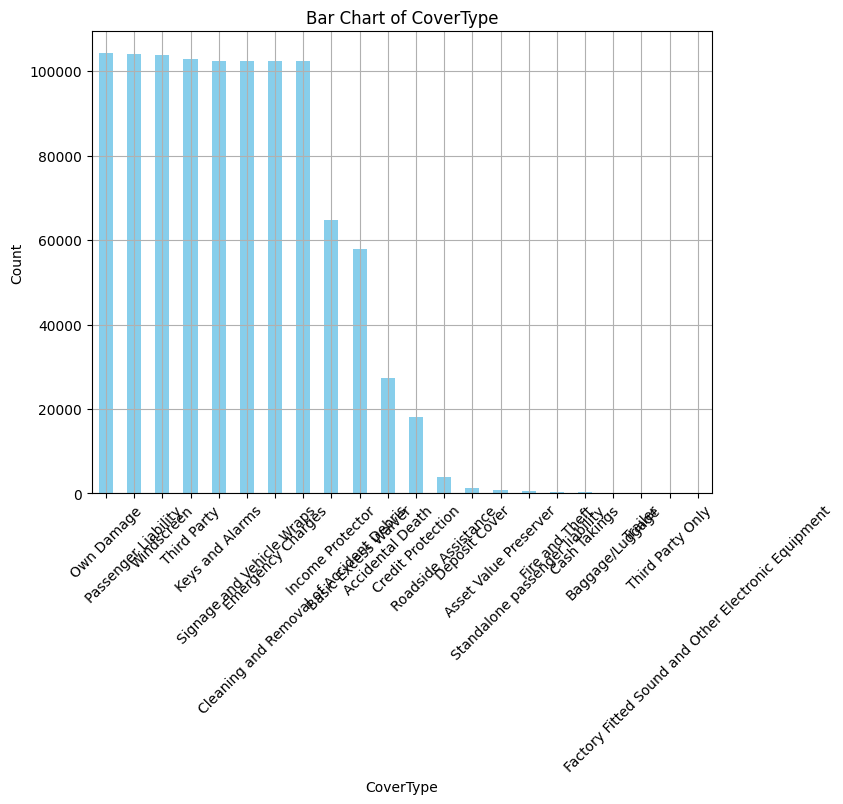

In [20]:
# plot bar chart for categorical columns 
plot_bar_charts(df_categorical_cols)

#### Bivariate or Multivariate Analysis

Bivariate analysis

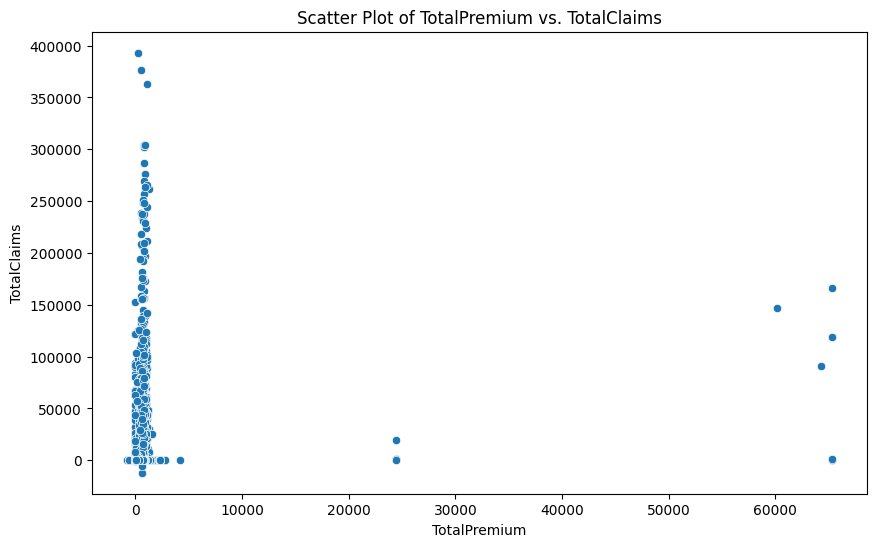

In [21]:
scatter_plot(df_relevant_cols, 'TotalPremium', 'TotalClaims')

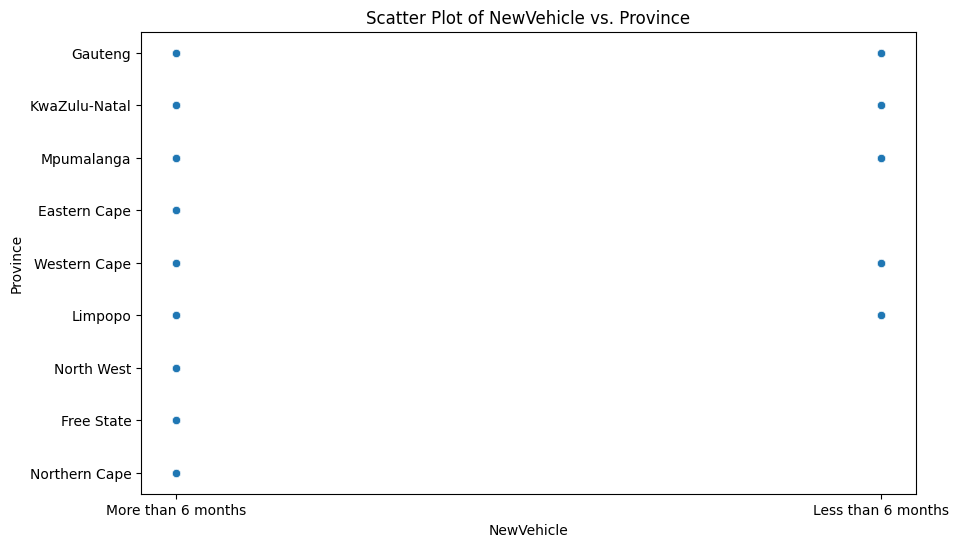

In [22]:
scatter_plot(df_relevant_cols, 'NewVehicle', 'Province')

Multivariate analysis

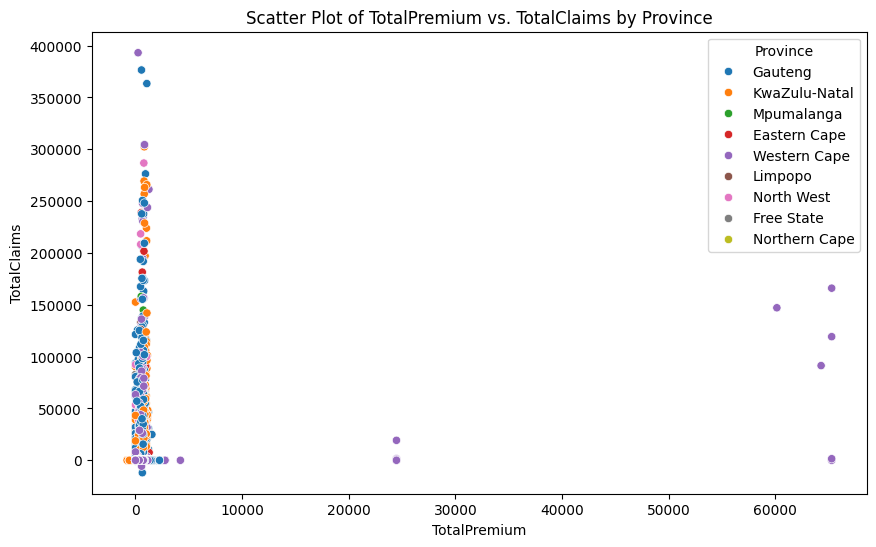

In [23]:
scatter_plot_advanced(df_relevant_cols, 'TotalPremium', 'TotalClaims', 'Province')

#### Outlier Detection

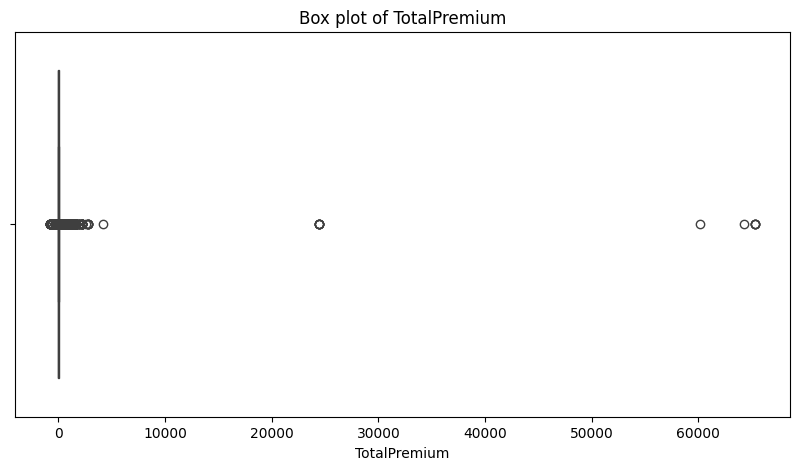

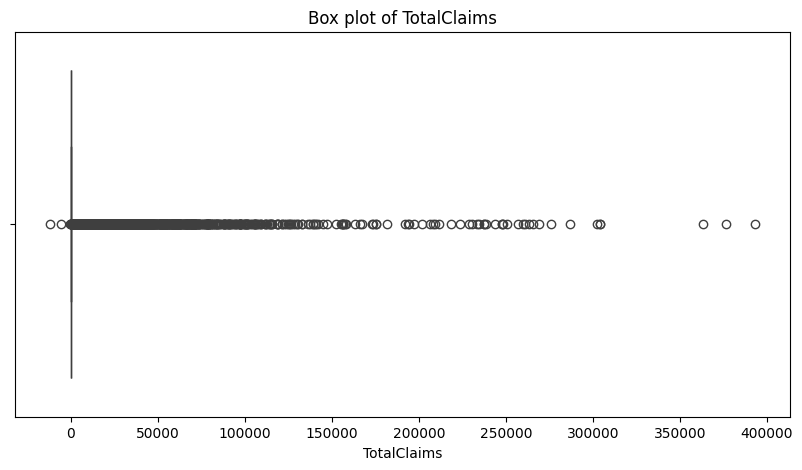

In [24]:
box_plots(df_numerical_cols)

Correlation Matrix

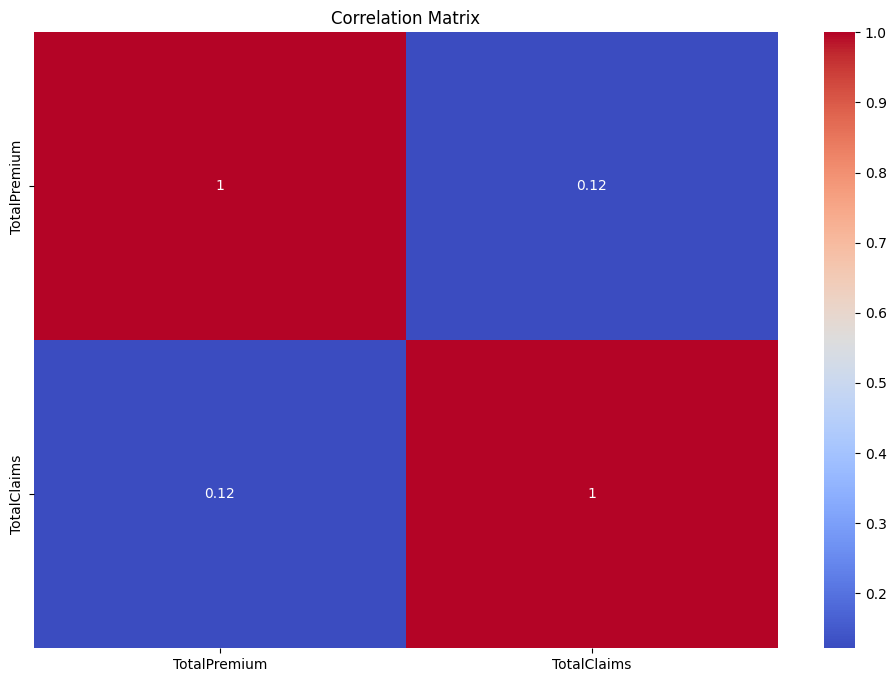

In [25]:
correlation_matrix = df_numerical_cols.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### Visualization

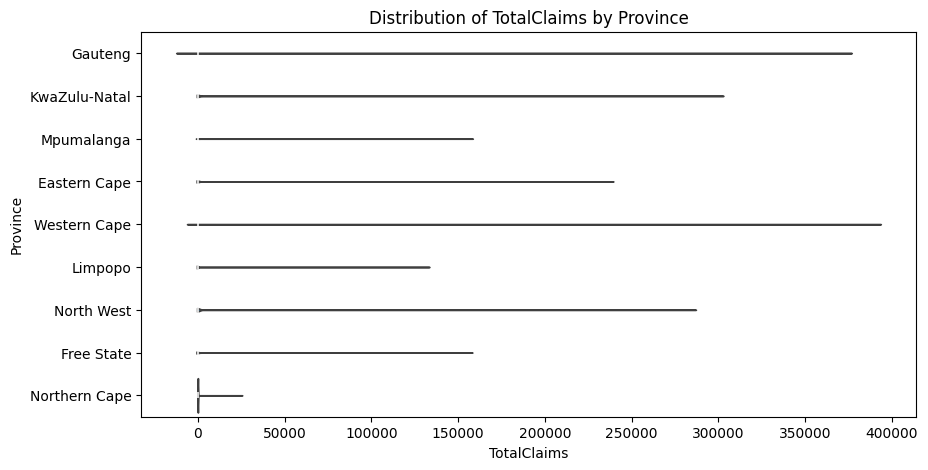

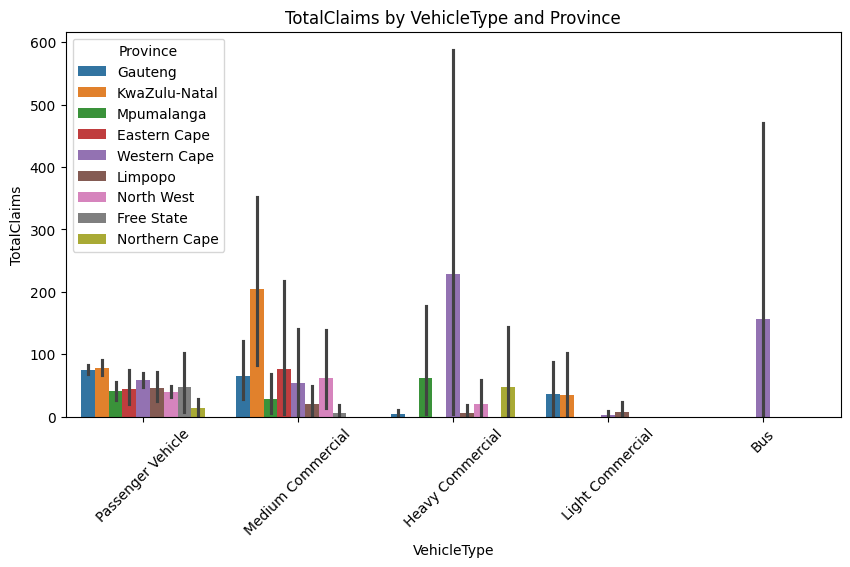

In [26]:
# Province & Total claims
plt.figure(figsize=(10, 5))
sns.violinplot(x='TotalClaims', y='Province', data=df_relevant_cols)
plt.title('Distribution of TotalClaims by Province')
plt.show()

# Total claims, vehicle type, & province 
plt.figure(figsize=(10, 5))
sns.barplot(x='VehicleType', y='TotalClaims', hue='Province', data=df_relevant_cols)
plt.title('TotalClaims by VehicleType and Province')
plt.xticks(rotation=45)
plt.show()
